In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
class LinearRegression:           #for training the model and make future predictions
  def fit(self, X, Y, intercept = False):   #fit() will take care of estimating theta parameters

      #record data and dimension
      if intercept == False: #add intercept (if not already included)
          ones = np.ones(len(X)).reshape(len(X), 1) #column of ones
          X = np.concatenate((ones, X), axis = 1)
      self.X = np.array(X)
      self.Y = np.array(Y)
      self.N, self.D = self.X.shape


      #estimate parameters
      XtX = np.dot(self.X.T, self.X)
      XtX_inverse = np.linalg.inv(XtX)
      XtY = np.dot(self.X.T, self.Y)
      self.theta_hats = np.dot(XtX_inverse, XtY)

      #make in sample predictions
      self.Y_hats = np.dot(self.X, self.theta_hats)

      #calculate loss
      self.L = .5*np.sum((self.Y - self.Y_hats)**2)

  def predict(self, X_test, intercept = True):

    #form predictions
    self.Y_test_hat = np.dot(X_test, self.theta_hats)

Trying LinearRegression class with some data. using the fetch_california_housing
 dataset from sklearn.datasets


In [10]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
Y = housing.target


In [15]:
model = LinearRegression()    #instantiate model
model.fit(X, Y, intercept = False)  #fit model

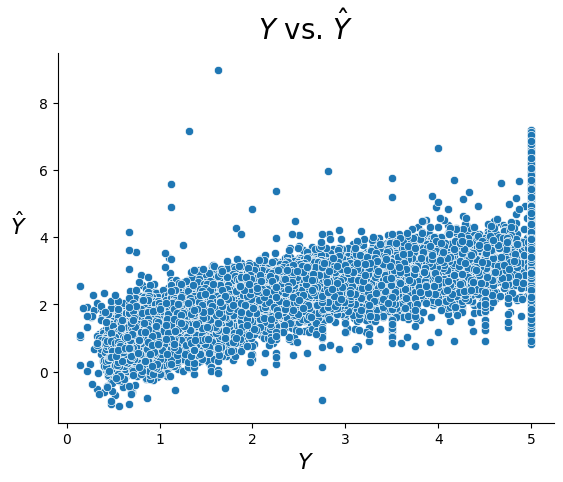

In [22]:
#visualisation

fig, ax = plt.subplots()
sns.scatterplot(x=model.Y, y=model.Y_hats, ax=ax)
ax.set_xlabel(r'$Y$', size = 16)
ax.set_ylabel(r'$\hat{Y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$Y$ vs. $\hat{Y}$', size = 20, pad = 10)
sns.despine()
